In [19]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

In [20]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13457958917544805511
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14626652160
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13799010443499990646
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [21]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

<function matplotlib.pyplot.show(close=None, block=None)>

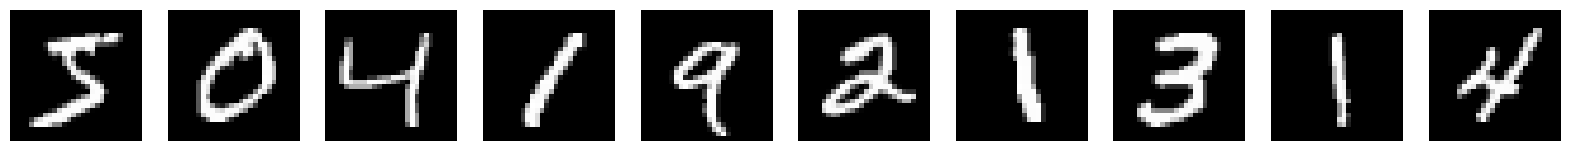

In [22]:
n=10
plt.figure(figsize=(20,4))
for i in range(n):
    plt.subplot(1,n,i+1)
    plt.imshow(x_train[i])
    plt.gray()
    plt.axis('off')
plt.show

In [23]:
print("Shape of x_train: {}".format(x_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [24]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)      # when dont know the no of samples
x_test = x_test.reshape(10000, 28, 28, 1)                    # when know the no of samples

In [25]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [26]:
x_train /= 255
x_test /= 255

In [27]:
# onehot encoder
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))
print("Shape of x_train: {}".format(x_train.shape))
print("Shape of x_test: {}".format(x_test.shape))

Shape of y_train: (60000, 10)
Shape of y_test: (10000, 10)
Shape of x_train: (60000, 28, 28, 1)
Shape of x_test: (10000, 28, 28, 1)


In [28]:
img_rows, img_cols, img_channel = 28, 28, 1
num_classes = 10
filters = [6,32,80,120]


In [29]:
model = Sequential()
model.add(Conv2D(filters[0], kernel_size=(3, 3), padding='same',
                 activation='relu',
                 input_shape=(img_rows, img_cols, img_channel)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters[1], kernel_size=(2,2), padding= "same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters[2], kernel_size=(2,2), padding= 'same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters[3], kernel_size=(2,2), padding= 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 6)         60        
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 32)        800       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 80)          10320     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 3, 3, 80)         

# Training the CNN

In [31]:
model.fit(x_train, y_train, validation_split=0.2, epochs=20, batch_size=64, verbose=1)


Epoch 1/20
750/750 [==============================] - 6s 7ms/step - loss: 2.0822 - accuracy: 0.3263 - val_loss: 1.2323 - val_accuracy: 0.5847
Epoch 2/20
750/750 [==============================] - 5s 6ms/step - loss: 0.6148 - accuracy: 0.8020 - val_loss: 0.3025 - val_accuracy: 0.9073
Epoch 3/20
750/750 [==============================] - 4s 5ms/step - loss: 0.2927 - accuracy: 0.9070 - val_loss: 0.2185 - val_accuracy: 0.9285
Epoch 4/20
750/750 [==============================] - 5s 6ms/step - loss: 0.2103 - accuracy: 0.9331 - val_loss: 0.1742 - val_accuracy: 0.9441
Epoch 5/20
750/750 [==============================] - 4s 5ms/step - loss: 0.1714 - accuracy: 0.9449 - val_loss: 0.1697 - val_accuracy: 0.9462
Epoch 6/20
750/750 [==============================] - 4s 5ms/step - loss: 0.1443 - accuracy: 0.9550 - val_loss: 0.1389 - val_accuracy: 0.9567
Epoch 7/20
750/750 [==============================] - 5s 6ms/step - loss: 0.1250 - accuracy: 0.9606 - val_loss: 0.1153 - val_accuracy: 0.9634
Epoch 

# Model Evaluation

In [32]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0502 - accuracy: 0.9836


[0.05015971511602402, 0.9836000204086304]

In [33]:
from sklearn.metrics import accuracy_score
y_pred_probs =model.predict(x_test)
y_pred=np.where(y_pred_probs>0.5,1,0)
test_accuracy= accuracy_score(y_test,y_pred)
print("Test Accuracy: {}".format(test_accuracy))

313/313 [==============================] - 1s 2ms/step
Test Accuracy: 0.9818


In [34]:
mask = range(20, 50)

x_valid = x_test[20:40]
actual_labels = y_test[20:40]

y_pred_probs_valid = model.predict(x_valid)
y_pred_valid = np.where(y_pred_probs_valid > 0.5, 1, 0)

1/1 [==============================] - 0s 19ms/step


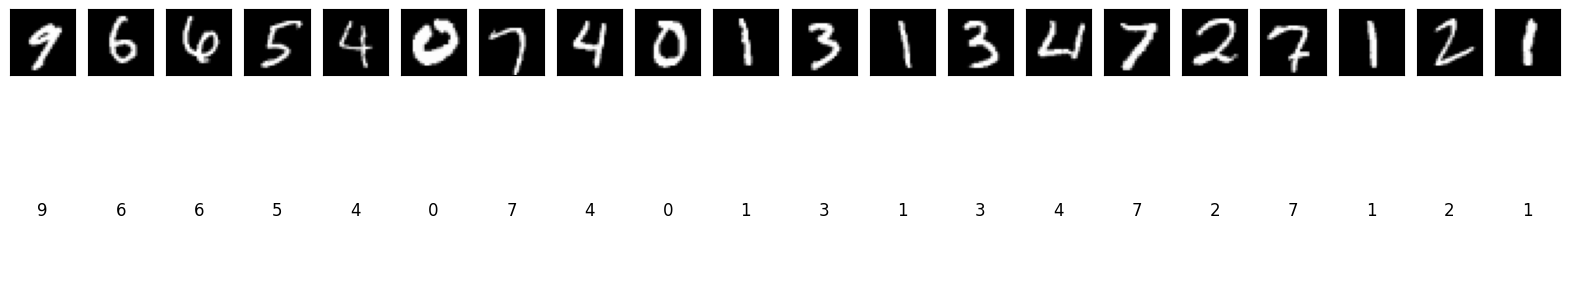

In [35]:
n = len(x_valid)
plt.figure(figsize=(20, 4))

for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_valid[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display the predicted digit
    predicted_digit = np.argmax(y_pred_probs_valid[i])
    ax = plt.subplot(2, n, i + 1 + n)
    plt.text(0.5, 0.5, str(predicted_digit), fontsize=12, ha='center', va='center')
    plt.axis('off')

# Show the plotted images
plt.show()

# Close the plot
plt.close()
